## The Sparks Foundation GRIP program
### Data Science & Business Analytics Internship
### Task - 3 (Prediction using Decision Tree Algorithm)
#### By - Dhananjay Pratap Lodhi

In [1]:
# importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
# creating a dataframe of the given data for easier analysis

df = pd.read_csv(r"C:\Users\Medhavi\Desktop\GRIP\Task_4\Iris.csv")
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
# returns the number of rows and columns

df.shape

(150, 6)

In [4]:
# to view some basic statistical details like percentile, mean, std etc. of a data frame

df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
df.isnull().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

This shows that the data does not contain any null values.

In [6]:
target = df[['Species']]
df = df.drop(['Id', 'Species'], axis=1)

In [7]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
# LabelEncoder is used because ML Algorithms understands only numbers and it 
# will convert the three species into three different numbers.

x = LabelEncoder()
target = x.fit_transform(target)
target

C:\Users\Medhavi\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
# we will split the dataset into training and testing sets using the scikit_learn built in train_test_split method.

x_train, x_test, y_train, y_test = train_test_split(df, target, test_size = 0.2, stratify = target)

In [10]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

print('Training is Completed')

Training is Completed


### Accuracy of the Model

In [11]:
print('Accuracy of Model:',model.score(x_test, y_test))

Accuracy of Model: 0.9333333333333333


### Visualizing the Decision Tree

In [12]:
import graphviz
from sklearn import tree

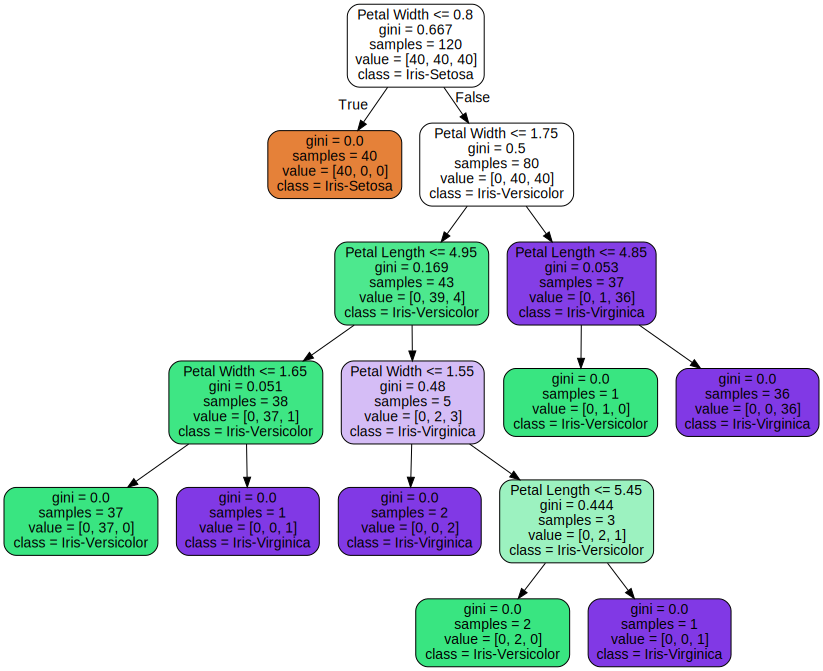

In [13]:
attributes = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']
types = ['Iris-Setosa', 'Iris-Versicolor', 'Iris-Virginica']
decision_tree = tree.export_graphviz(model, feature_names = attributes, class_names = types, filled=True, rounded=True)
D_tree = graphviz.Source(decision_tree, format = 'png')
D_tree